In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Image_Analyzed.csv")
print(df.head())

   User  Time  Coffee  Age  Image_Analyzed Produtivity
0     1     8       0   23              20        Good
1     1    13       0   23              14         Bad
2     1    17       0   23              18        Good
3     1    22       0   23              15         Bad
4     1     8       2   23              22        Good


##### Step1 : Reading the data and understanding

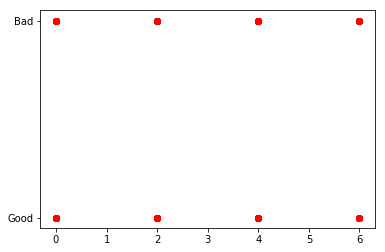

In [64]:
plt.scatter(df.Coffee,df.Produtivity,marker='o',color='red')

There is nothing to observer that some one is below or someone is above.we can not find anything from this output

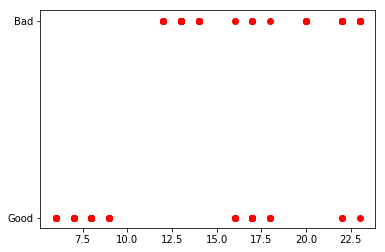

In [65]:
plt.scatter(df.Time,df.Produtivity,marker='o',color='red')

Observation: We found before lunch productivity is good but after lunch it is bad but it is ok for some of times

([<matplotlib.patches.Wedge at 0x28456efc668>,
 [Text(-0.0863049,1.09661,''), Text(0.0863048,-1.09661,'')],
 [Text(-0.0470754,0.59815,'52.5%'), Text(0.0470754,-0.59815,'47.5%')])

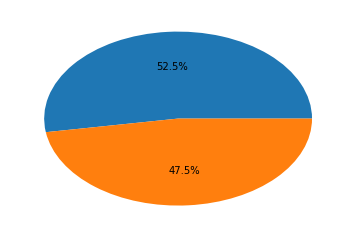

In [66]:
sizes = df['Produtivity'].value_counts(sort=1)
plt.pie(sizes,autopct='%1.1f%%')

Obersvation : Data is balanced 

##### Step2 : Drop IRRELEVANT Data

In [67]:
#we are dropping Image_Analyzed column and user because there is no effect on productivity
df.drop(['Image_Analyzed'],axis=1,inplace=True)
df.drop(['User'],axis=1,inplace=True)
print(df.head())

   Time  Coffee  Age Produtivity
0     8       0   23        Good
1    13       0   23         Bad
2    17       0   23        Good
3    22       0   23         Bad
4     8       2   23        Good


##### Step3 : Drop with missing values. If we apply drop,the rows which are having missing values it will be removed

In [68]:
df=df.dropna()
df


,Time,Coffee,Age,Produtivity
0,8,0,23,Good
1,13,0,23,Bad
2,17,0,23,Good
3,22,0,23,Bad
4,8,2,23,Good
5,13,2,23,Bad
6,17,2,23,Good
7,22,2,23,Good
8,8,4,23,Good
9,13,4,23,Bad


##### Step4 : Convert non-numeric to numeric

In [69]:
import warnings
warnings.filterwarnings('ignore')
df.Produtivity[df.Produtivity=='Good']=1
df.Produtivity[df.Produtivity=='Bad']=0
df.head()

,Time,Coffee,Age,Produtivity
0,8,0,23,1
1,13,0,23,0
2,17,0,23,1
3,22,0,23,0
4,8,2,23,1


##### Step5 : Prepare the data(define dependent/independent variable)

In [70]:
Y = df['Produtivity'].values
Y  = Y.astype('int')
Y

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [71]:
X = df.drop(labels = ['Produtivity'],axis=1)
print(X.head())

   Time  Coffee  Age
0     8       0   23
1    13       0   23
2    17       0   23
3    22       0   23
4     8       2   23


##### Step 6 : If you are doing data analyst or machine learning model . You always split the data into training and test data

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=20)


Observation : We split the data into train and test . We define test size = 30% and 70% train data  and we define the random state because we will get same output at every run

##### Step7 : Define the model

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #initialize the model with model variable
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Step8:Testing the model

In [74]:
prediction_test = model.predict(X_test)
print("Prediction_test")
print(prediction_test)
print("Y_test")
print(y_test)

Prediction_test
[0 0 0 1 1 0 1 0]
Y_test
[0 1 0 1 0 0 1 0]


##### Step9:Verify the accuracy

In [75]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test,prediction_test))

Accuracy= 0.75


Observation : We got bad accuracy . To improve this we have to change test_size . So For test_size=0.3, we got accuracy 0.5  but for test size 0.1, we got accuracy 75% which is pretty good

##### Step10 : Weights

In [76]:
print(model.coef_)

[[-0.11152413 -0.11219146  0.00456819]]


Observation : I did not get . The weight we got it is with corresponding

In [62]:
weights = pd.Series(model.coef_[0],index=X.columns.values)
print(weights)

Time     -0.111524
Coffee   -0.112191
Age       0.004568
dtype: float64
